In [50]:
import numpy as np
import pandas as pd


In [51]:
np.__version__

'1.24.4'

In [52]:
pd.__version__

'2.2.2'

In [53]:
df = pd.read_csv("agricultural_raw_material.csv")

**Após importar as bibliotecas e carregar o csv para dentro de um quadro utilizando Pandas. Podemos começar nosso projeto**

In [54]:
df.info
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [55]:
df.columns = [str(i).lower() for i in df.columns]

#deixando colunas em minúsculo

#substituindo registros inválidos por null
df = df.replace('%', '', regex = True)
df = df.replace(',', '', regex = True)
df = df.replace('-', '', regex = True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

df = df.dropna() #excluindo registros inválidos

df.isnull().sum() #verificando se ainda há nulos

#convertendo para float
lst = df.columns[1:]
df[lst] = df[lst].astype('float')

df.dtypes

month                            object
coarse wool price               float64
coarse wool price % change      float64
copra price                     float64
copra price % change            float64
cotton price                    float64
cotton price % change           float64
fine wool price                 float64
fine wool price % change        float64
hard log price                  float64
hard log price % change         float64
hard sawnwood price             float64
hard sawnwood price % change    float64
hide price                      float64
hide price % change             float64
plywood price                   float64
plywood price % change          float64
rubber price                    float64
rubber price % change           float64
softlog price                   float64
softlog price % change          float64
soft sawnwood price             float64
soft sawnwood price % change    float64
wood pulp price                 float64
wood pulp price % change        float64


**Aqui vemos o tipo, e tratamos as colunas que tiverem valor Nulo.**

In [56]:
df.head()

,month,coarse wool price,coarse wool price % change,copra price,copra price % change,cotton price,cotton price % change,fine wool price,fine wool price % change,hard log price,...,plywood price,plywood price % change,rubber price,rubber price % change,softlog price,softlog price % change,soft sawnwood price,soft sawnwood price % change,wood pulp price,wood pulp price % change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [57]:

print(df.columns)


Index(['month', 'coarse wool price', 'coarse wool price % change',
       'copra price', 'copra price % change', 'cotton price',
       'cotton price % change', 'fine wool price', 'fine wool price % change',
       'hard log price', 'hard log price % change', 'hard sawnwood price',
       'hard sawnwood price % change', 'hide price', 'hide price % change',
       'plywood price', 'plywood price % change', 'rubber price',
       'rubber price % change', 'softlog price', 'softlog price % change',
       'soft sawnwood price', 'soft sawnwood price % change',
       'wood pulp price', 'wood pulp price % change'],
      dtype='object')


In [58]:

df.rename(columns={'month': 'Month'}, inplace=True)

df['Month'] = pd.to_datetime(df['Month'].str.upper(), format="%b%y", yearfirst=False)


df = df.set_index('Month')

In [59]:
df.head()

,coarse wool price,coarse wool price % change,copra price,copra price % change,cotton price,cotton price % change,fine wool price,fine wool price % change,hard log price,hard log price % change,...,plywood price,plywood price % change,rubber price,rubber price % change,softlog price,softlog price % change,soft sawnwood price,soft sawnwood price % change,wood pulp price,wood pulp price % change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [60]:
print(df.columns)

Index(['coarse wool price', 'coarse wool price % change', 'copra price',
       'copra price % change', 'cotton price', 'cotton price % change',
       'fine wool price', 'fine wool price % change', 'hard log price',
       'hard log price % change', 'hard sawnwood price',
       'hard sawnwood price % change', 'hide price', 'hide price % change',
       'plywood price', 'plywood price % change', 'rubber price',
       'rubber price % change', 'softlog price', 'softlog price % change',
       'soft sawnwood price', 'soft sawnwood price % change',
       'wood pulp price', 'wood pulp price % change'],
      dtype='object')


**Aqui tratamos as colunas para deixar a coluna Month(mês) como uma coluna index**

In [61]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


**Aqui importamos algumas outras bibliotecas, como o seaborn e o matplotlib. Também definimos estilos para eles.**

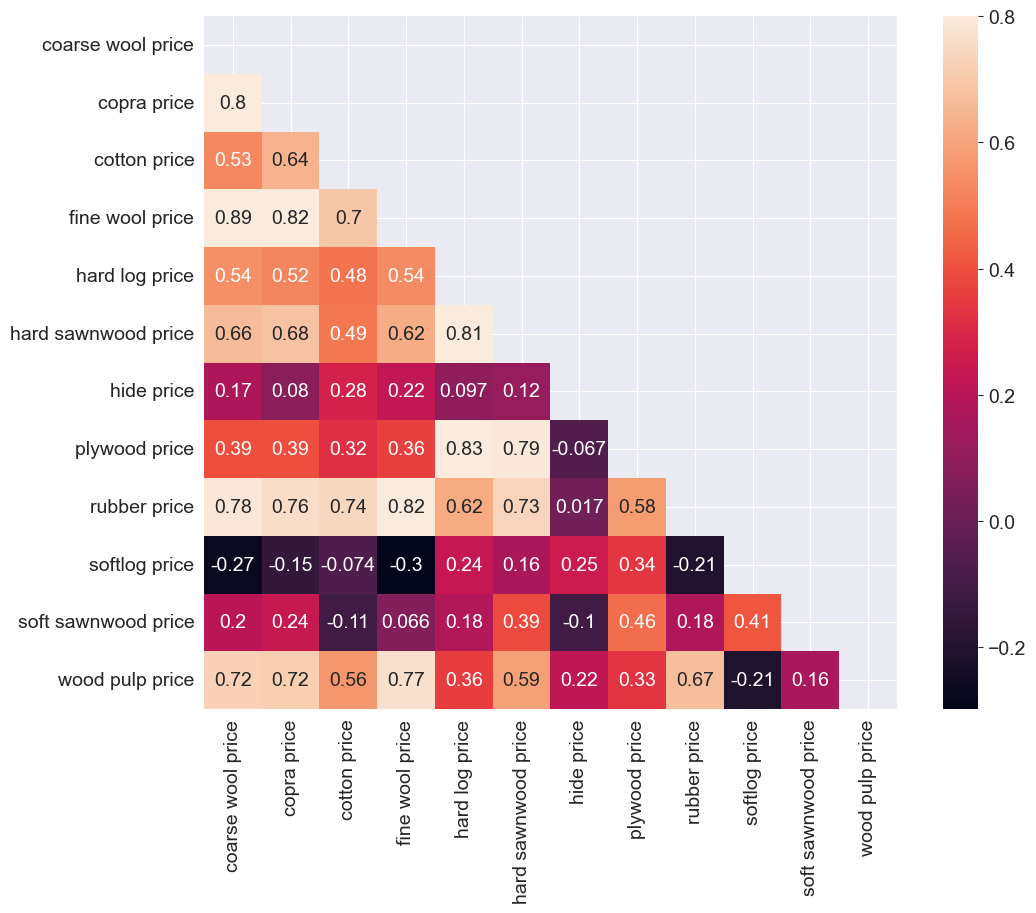

In [62]:
raw_data=['coarse wool price', 'copra price','cotton price', 'fine wool price', 'hard log price','hard sawnwood price',
          'hide price','plywood price','rubber price','softlog price','soft sawnwood price','wood pulp price', ]


corrmat = df[raw_data].corr()

fig = plt.figure(figsize = (12, 9))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8, mask=mask, square = True, annot = True)
plt.show()

**Este mapa de calor mostra a relação das matérias-primas. Quanto maior o valor relacionado maior é a chance de serem matérias-primas relacionadas.**



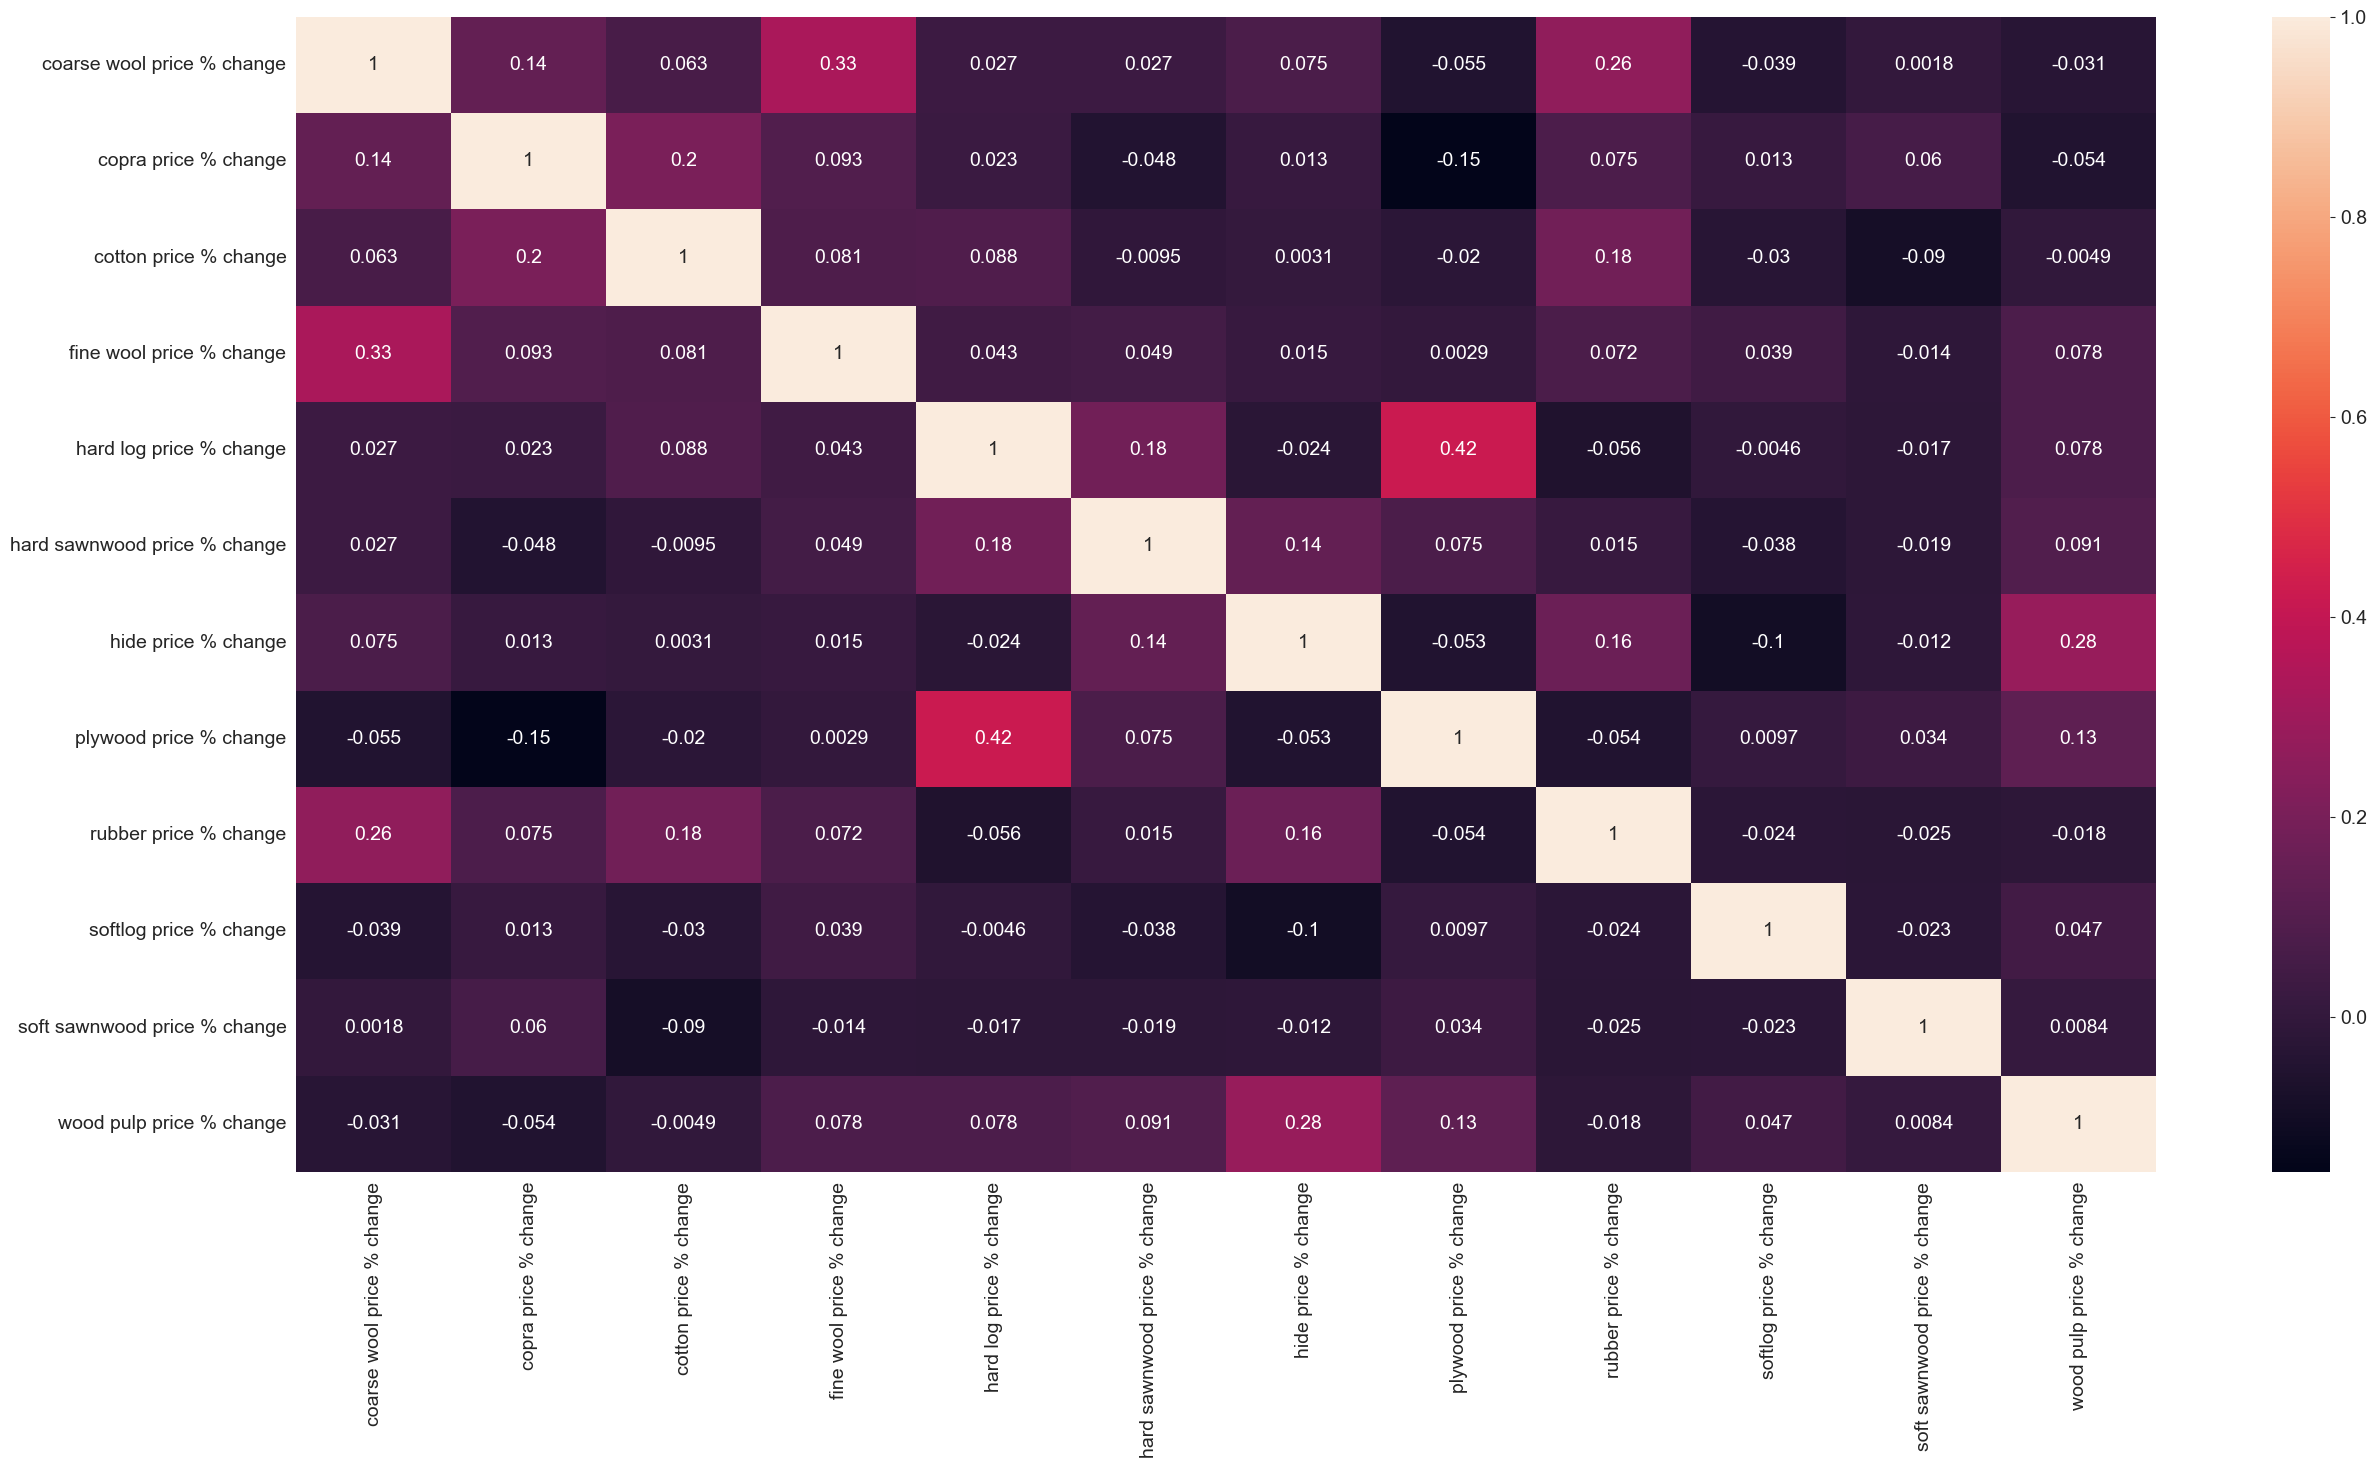

In [63]:
plt.figure(figsize=(30,15))

changeList=[ 'coarse wool price % change','copra price % change','cotton price % change','fine wool price % change'
            ,'hard log price % change', 'hard sawnwood price % change',  'hide price % change','plywood price % change',
            'rubber price % change',  'softlog price % change','soft sawnwood price % change','wood pulp price % change']

corrMatrix = df[changeList].corr()

sns.heatmap(corrMatrix, annot=True)
plt.show()

A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias primas

* o valor negativo implica que duas variáveis ​​estão negativamente correlacionadas (um aumento, outro decréscimo)
* Zero implica nenhuma relação
* caso contrário, maior o valor maior a chance de relação.
preços e seus gráficos de % de mudança



**O código abaixo mostra a evolução de preço da Lã Grossa**


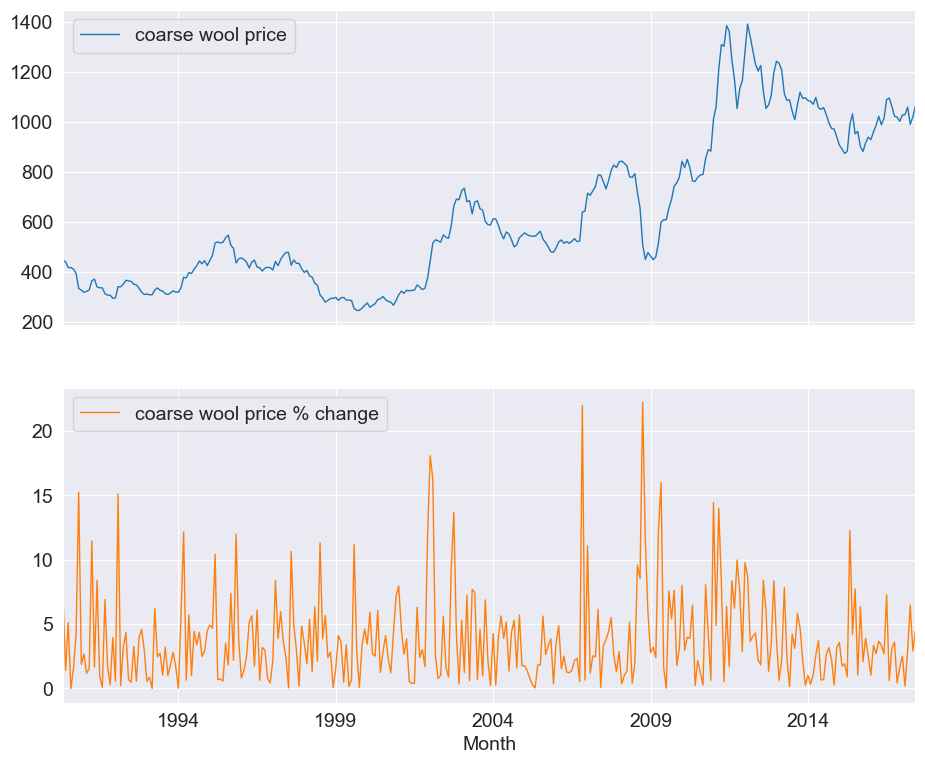

In [64]:
axes = df[["coarse wool price", "coarse wool price % change"]].plot(figsize=(11,9), subplots=True, linewidth=1)

**Perguntas e Respostas de negócios.**


**Q1: Descubrir a variação normal do preço de cada matéria-prima**

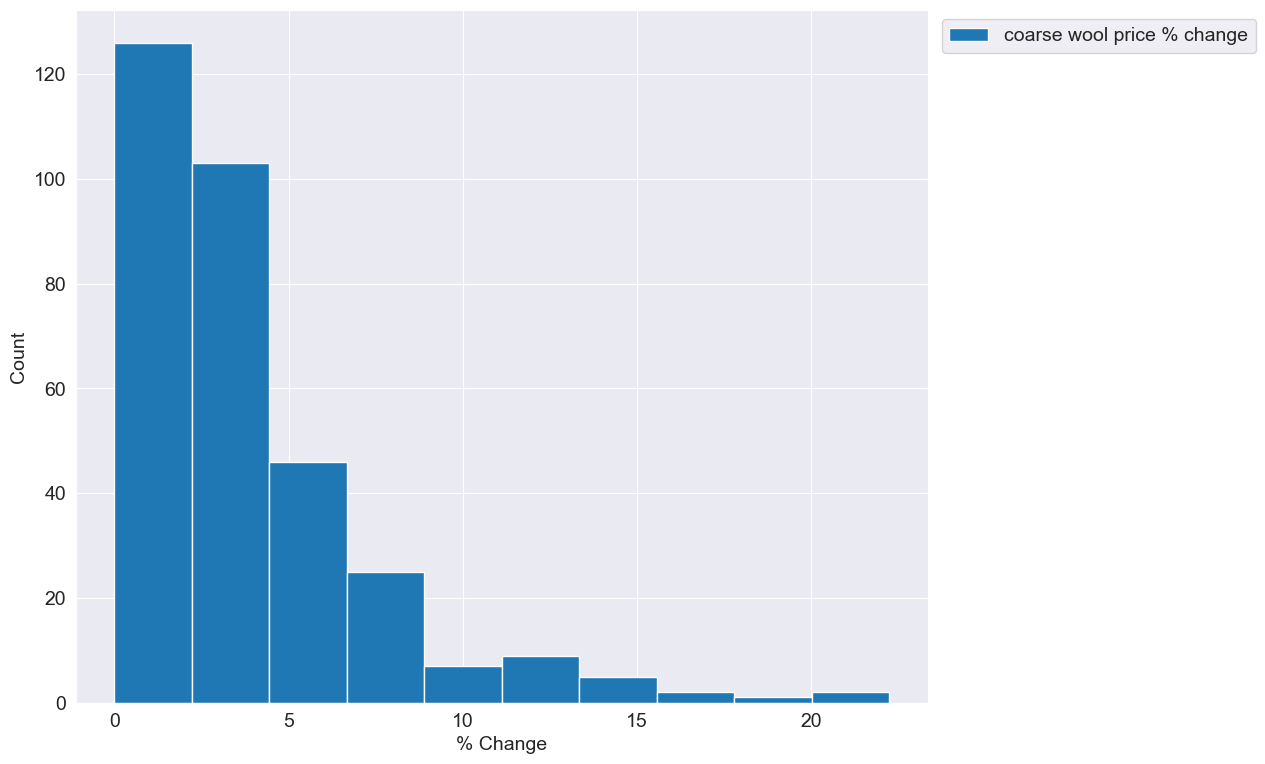

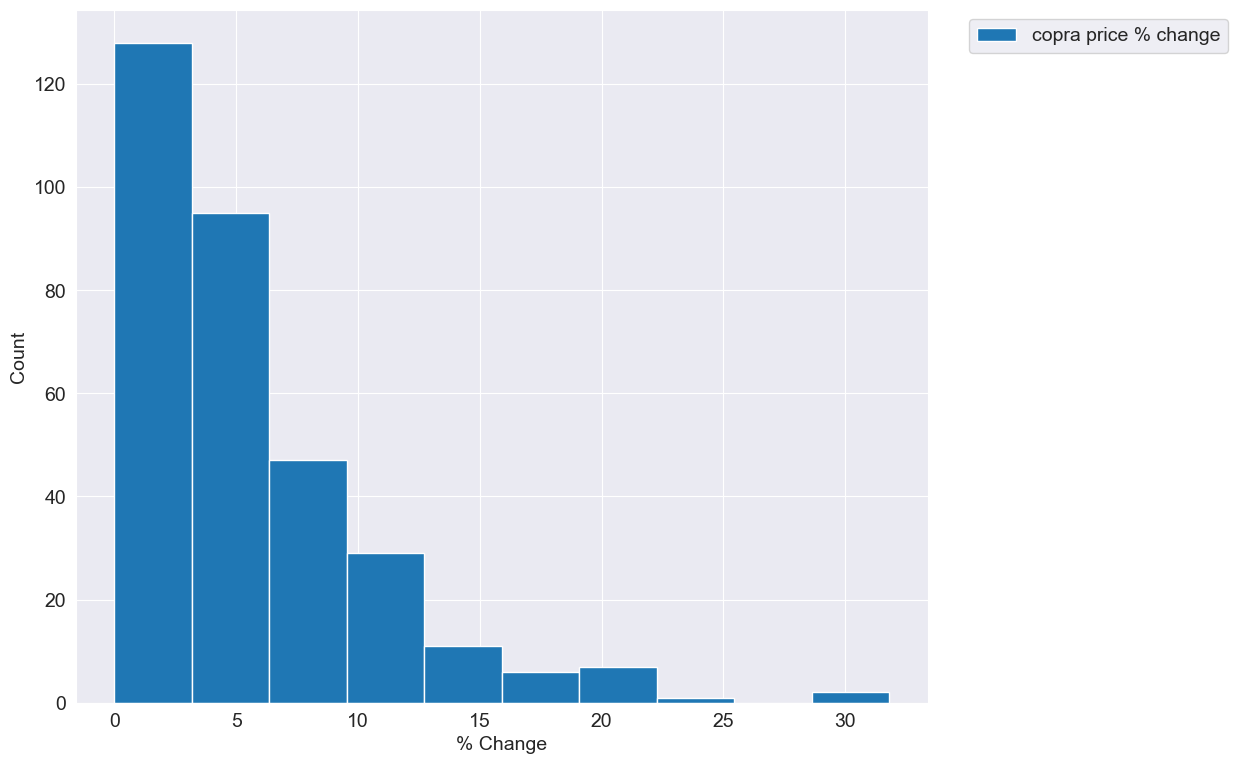

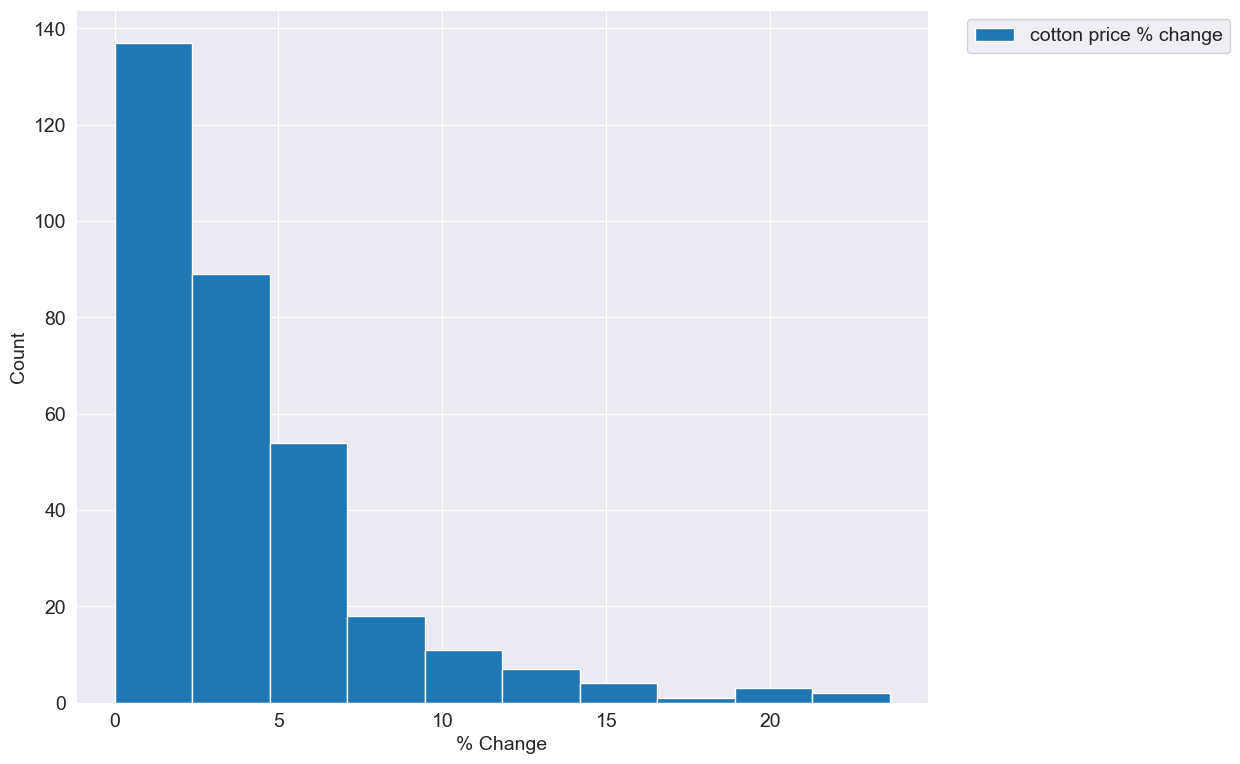

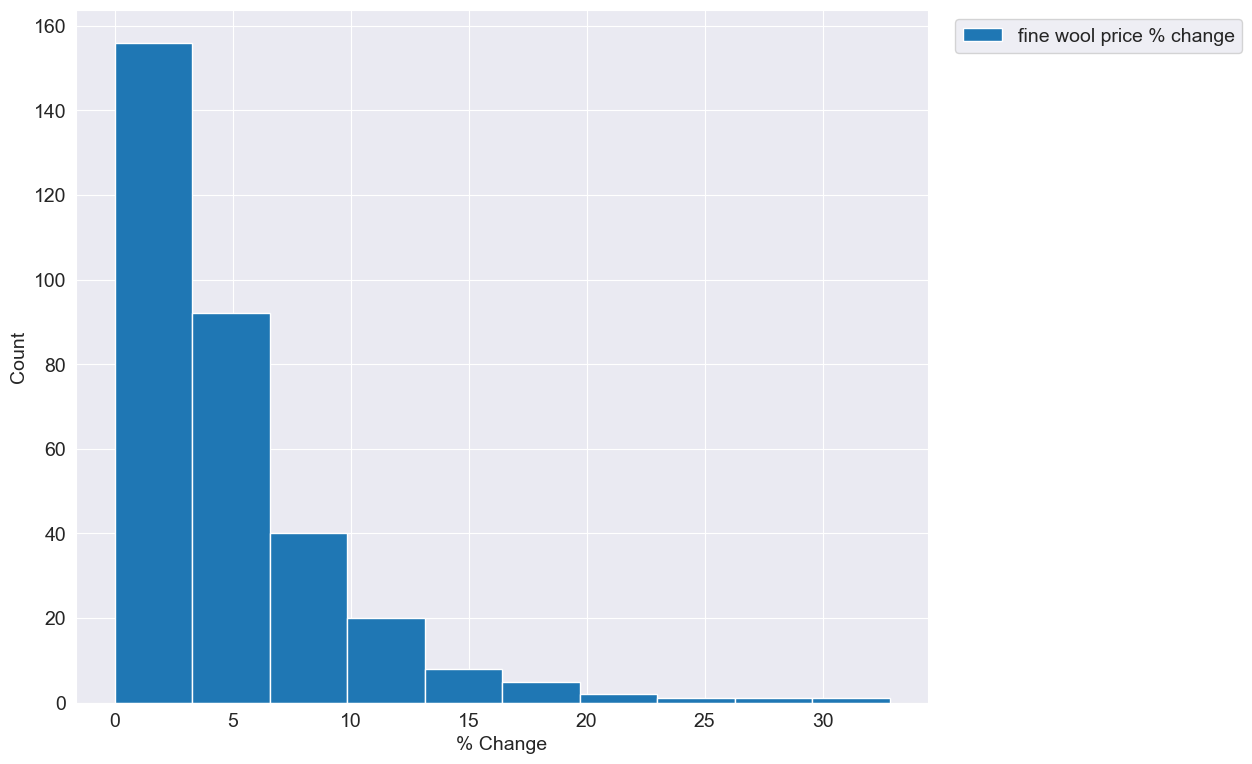

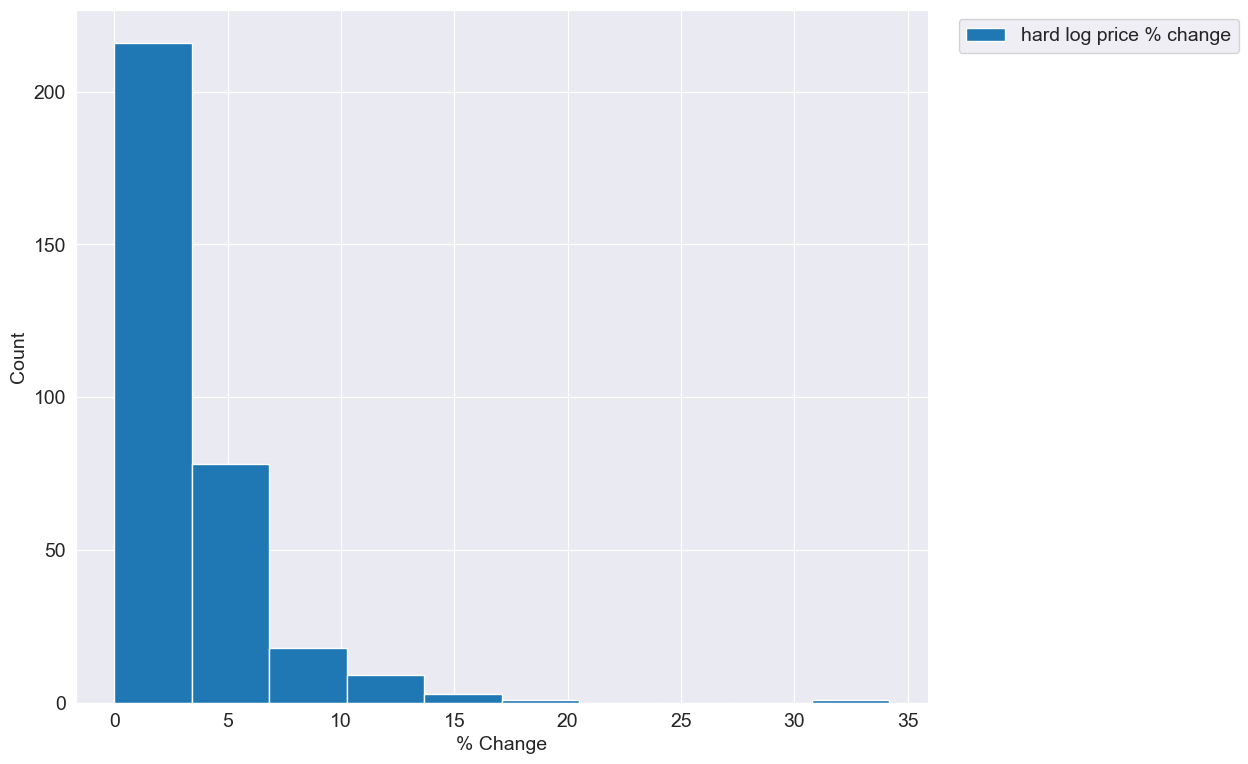

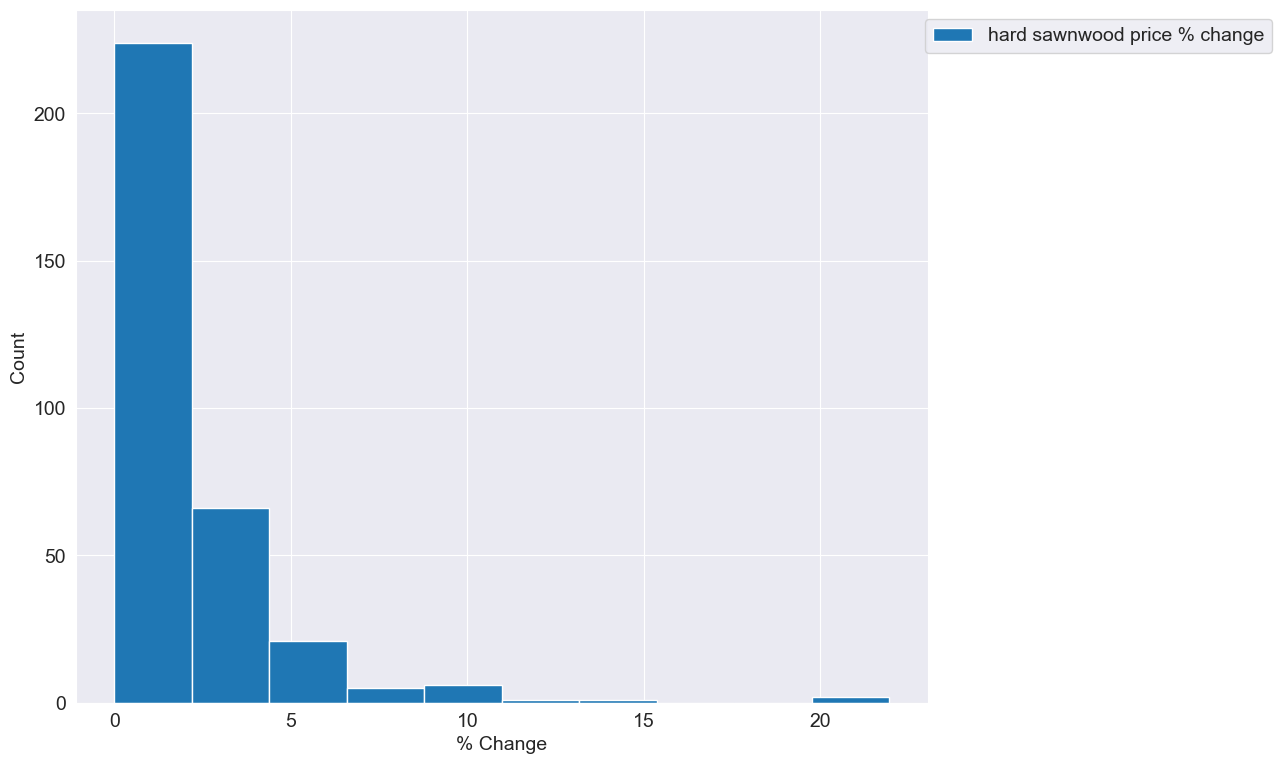

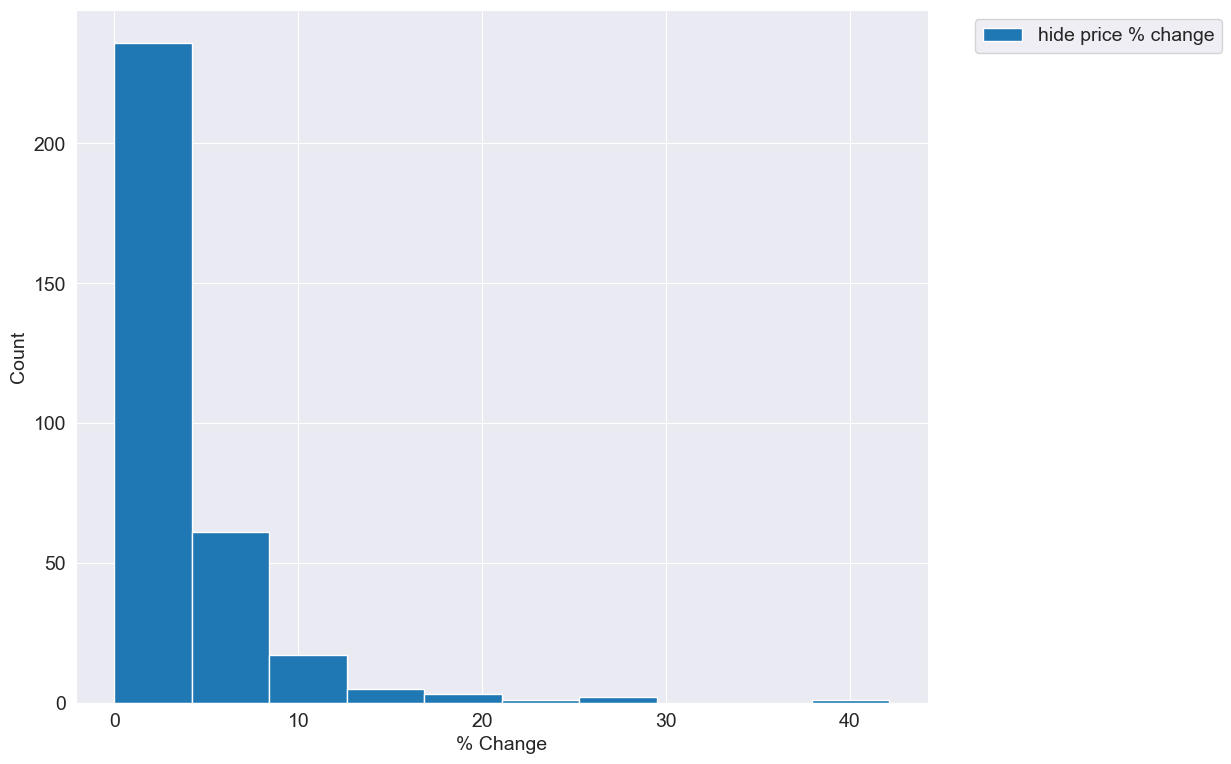

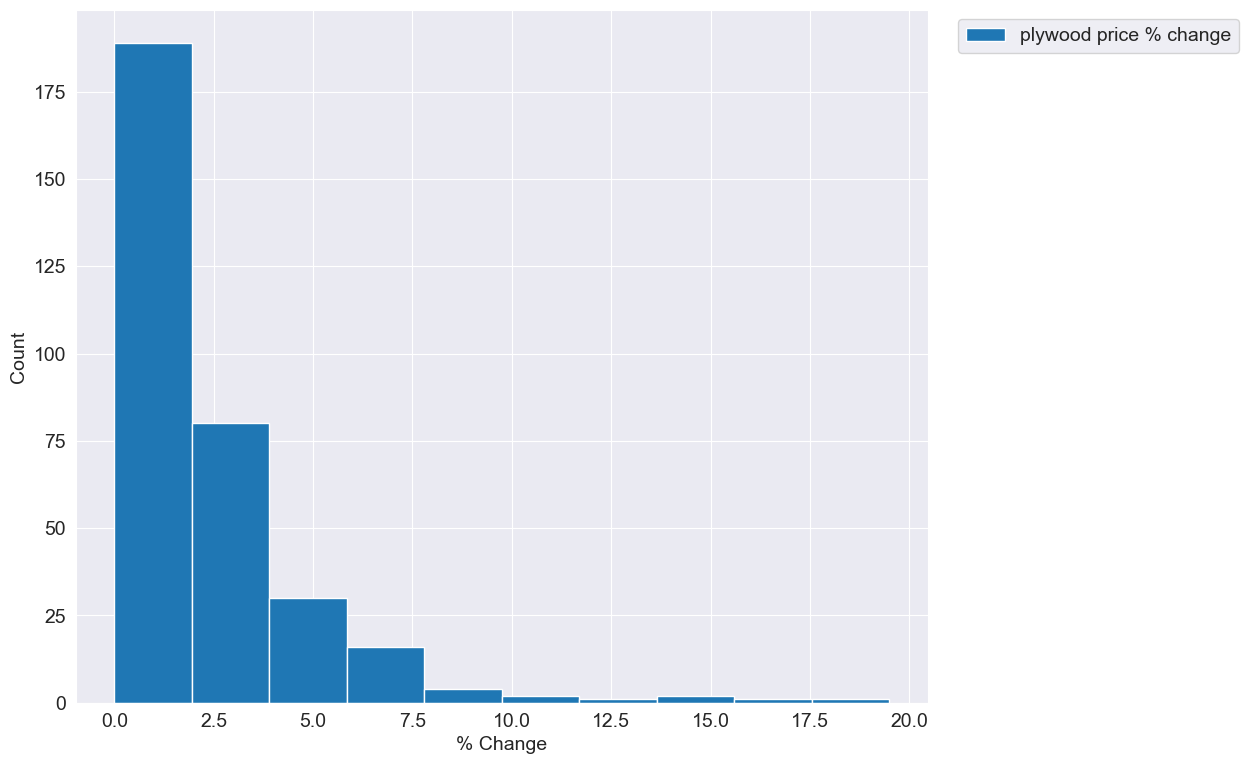

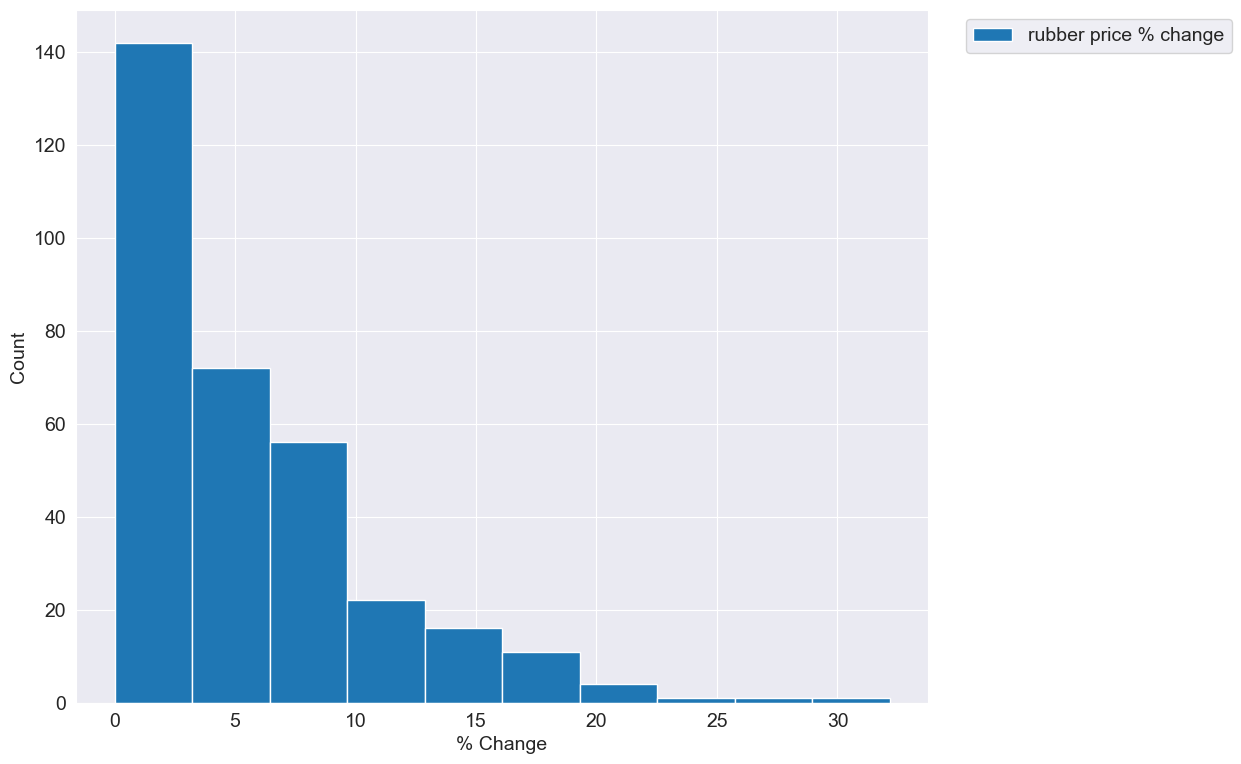

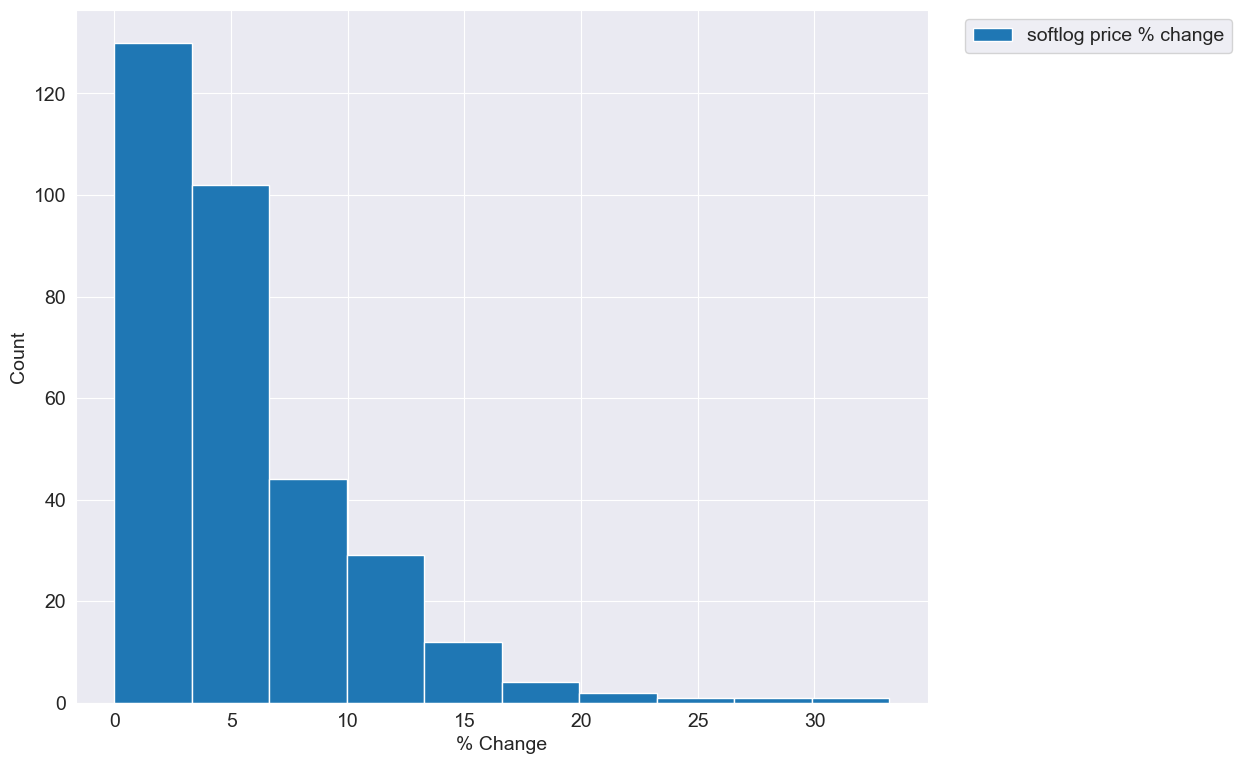

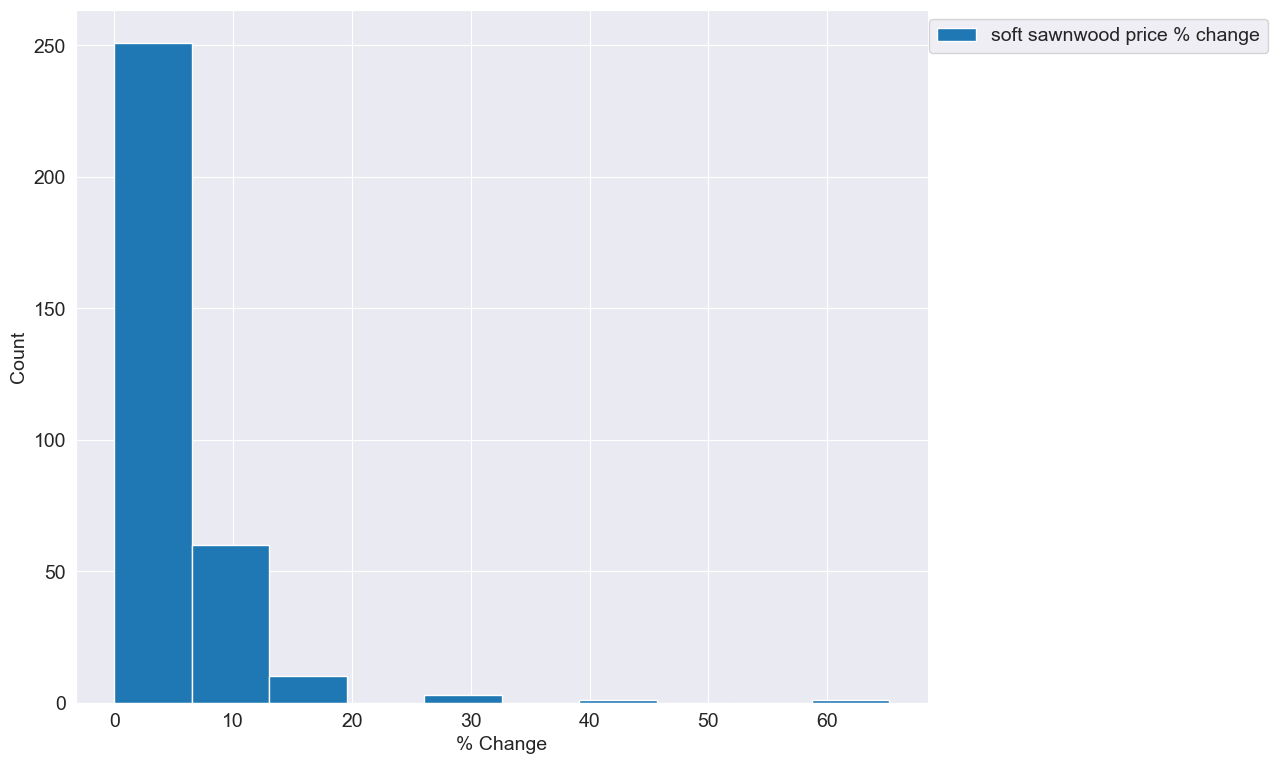

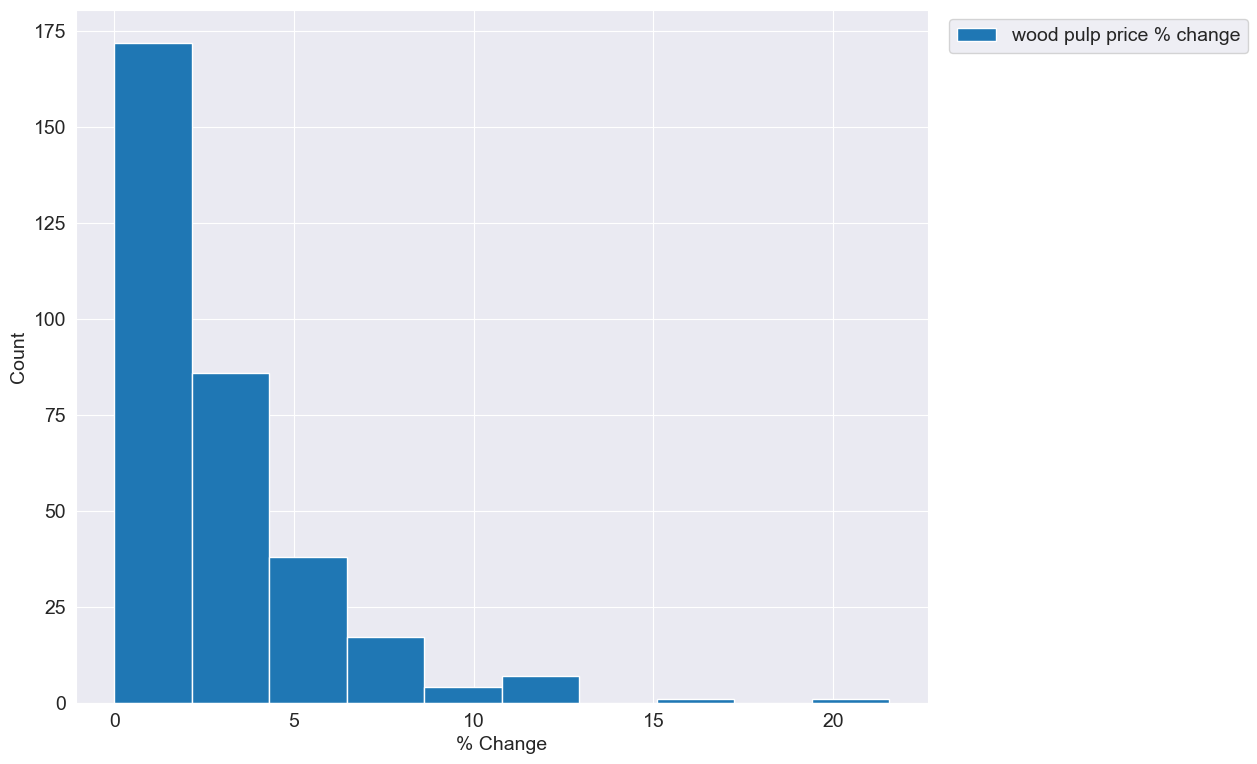

In [65]:
changeList=[ 'coarse wool price % change','copra price % change','cotton price % change','fine wool price % change'
            ,'hard log price % change', 'hard sawnwood price % change',  'hide price % change','plywood price % change',
            'rubber price % change',  'softlog price % change','soft sawnwood price % change','wood pulp price % change']


for i in range(len(changeList)):
    plt.figure(figsize=(12,12))
    df[changeList[i]].hist(figsize=(11,9), linewidth=1)
    plt.xlabel("% Change")
    plt.ylabel("Count")
    plt.legend(changeList[i:],loc='upper center',bbox_to_anchor=(1.2,1))

Com este gráficos podemos analisar que a grande maioria das matérias-primas tem um % de mudança inferior a 5%

**Q2: Encontrar a matéria-prima que tem o menor preço ao longo dos anos**

Text(0.5, 0.98, 'Raw-Materials price comparision')

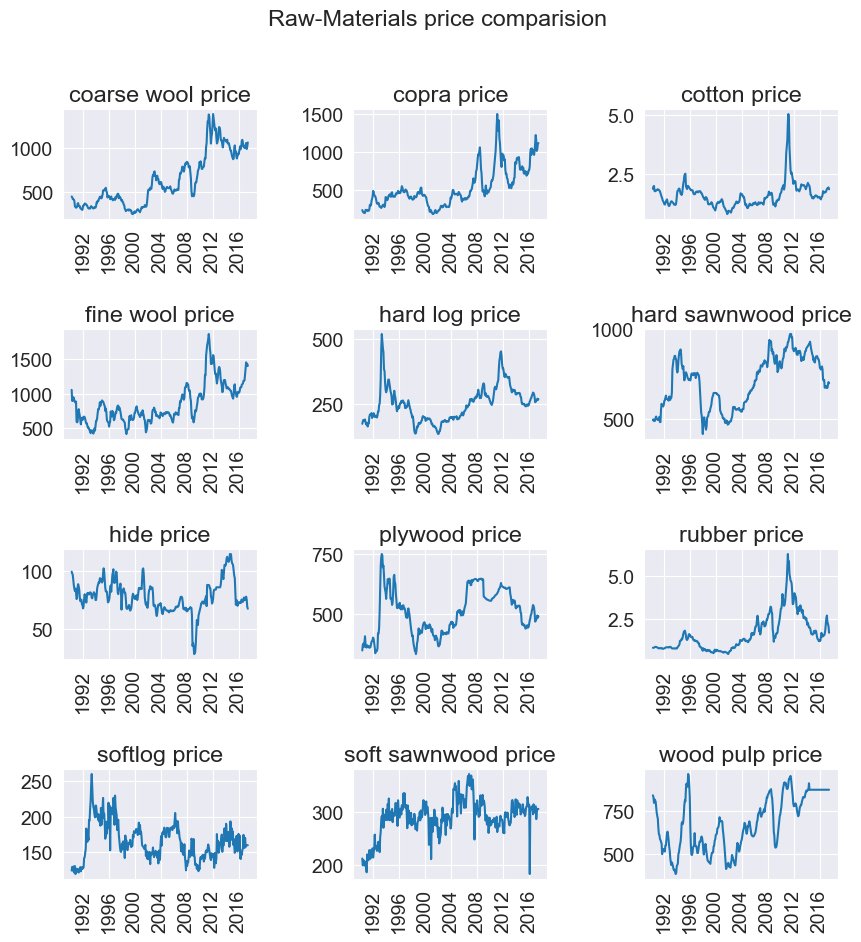

In [66]:
plt.figure(figsize=(10,10))
materialList = ['coarse wool price', 'copra price','cotton price', 'fine wool price', 'hard log price','hard sawnwood price',
          'hide price','plywood price','rubber price','softlog price','soft sawnwood price','wood pulp price']

for i in range(len(materialList)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1, wspace=0.5)
    plt.title(materialList[i])
    plt.plot(df[materialList[i]])
    plt.xticks(rotation=90)
plt.suptitle("Raw-Materials price comparision")


**Após análise que as matérias-primas Rubber(borracha) e Cotton(Algodão) são os menores preços. Agora iremos comparar os dois para ver qual é mais baixo.**

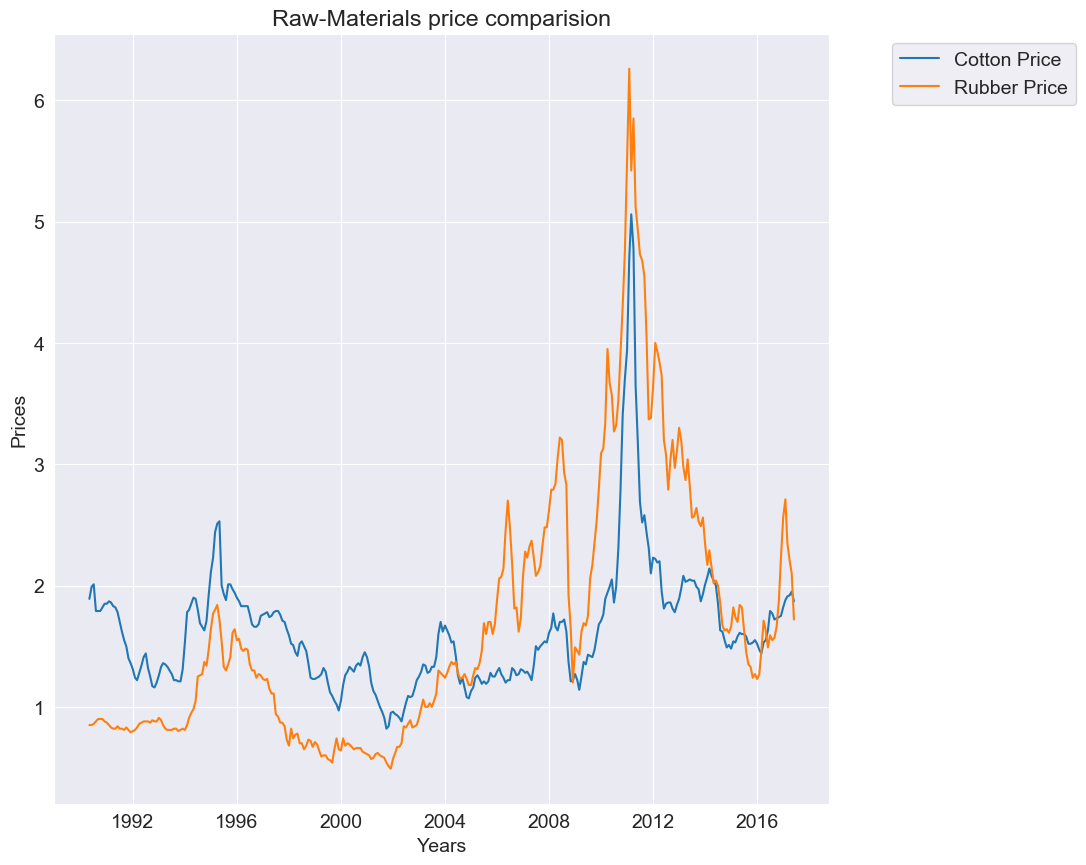

In [67]:
plt.figure(figsize=(10,10))
plt.plot(df[["cotton price", "rubber price"]])
plt.title("Raw-Materials price comparision")
plt.xlabel("Years")
plt.ylabel("Prices")
plt.legend(["Cotton Price", "Rubber Price"], loc="upper center", bbox_to_anchor=(1.2,1))

**Após comparação, é nítido que o menor preço é o algodão. Ele estava com preço maior que a borracha em 1992 até 2005.Entretanto, apartir deste ano ele começou a decair e ficou com o preço inferior a borracha**


**Q3: qual matéria-prima tem a maior e menor variação de % de preço**

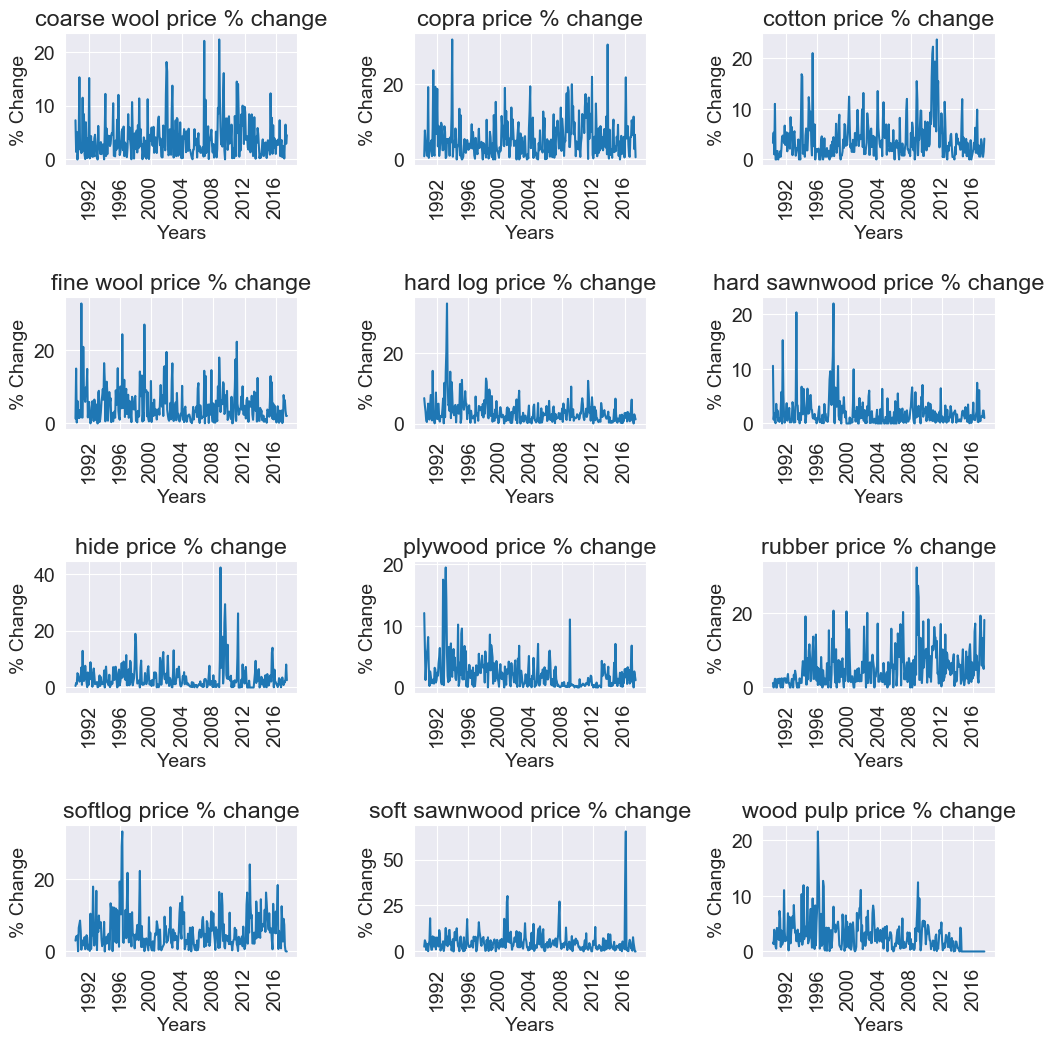

In [68]:
plt.figure(figsize=(12,12))
for i in  range(len(changeList)):
    
    
    
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1, wspace=0.5)
    plt.plot(df[changeList[i]])
    plt.xticks(rotation=90)
    plt.title(changeList[i])
    plt.xlabel("Years")
    plt.ylabel("% Change")
    

**Analisando os gráficos, podemos perceber que a madeira serrada macia é a maior com uma % maior que 60, enquanto a menor % fica com a madeira compensada que está em menos de 20.**

**Q4: Encontre as matérias-primas com mudança drástica de preço**

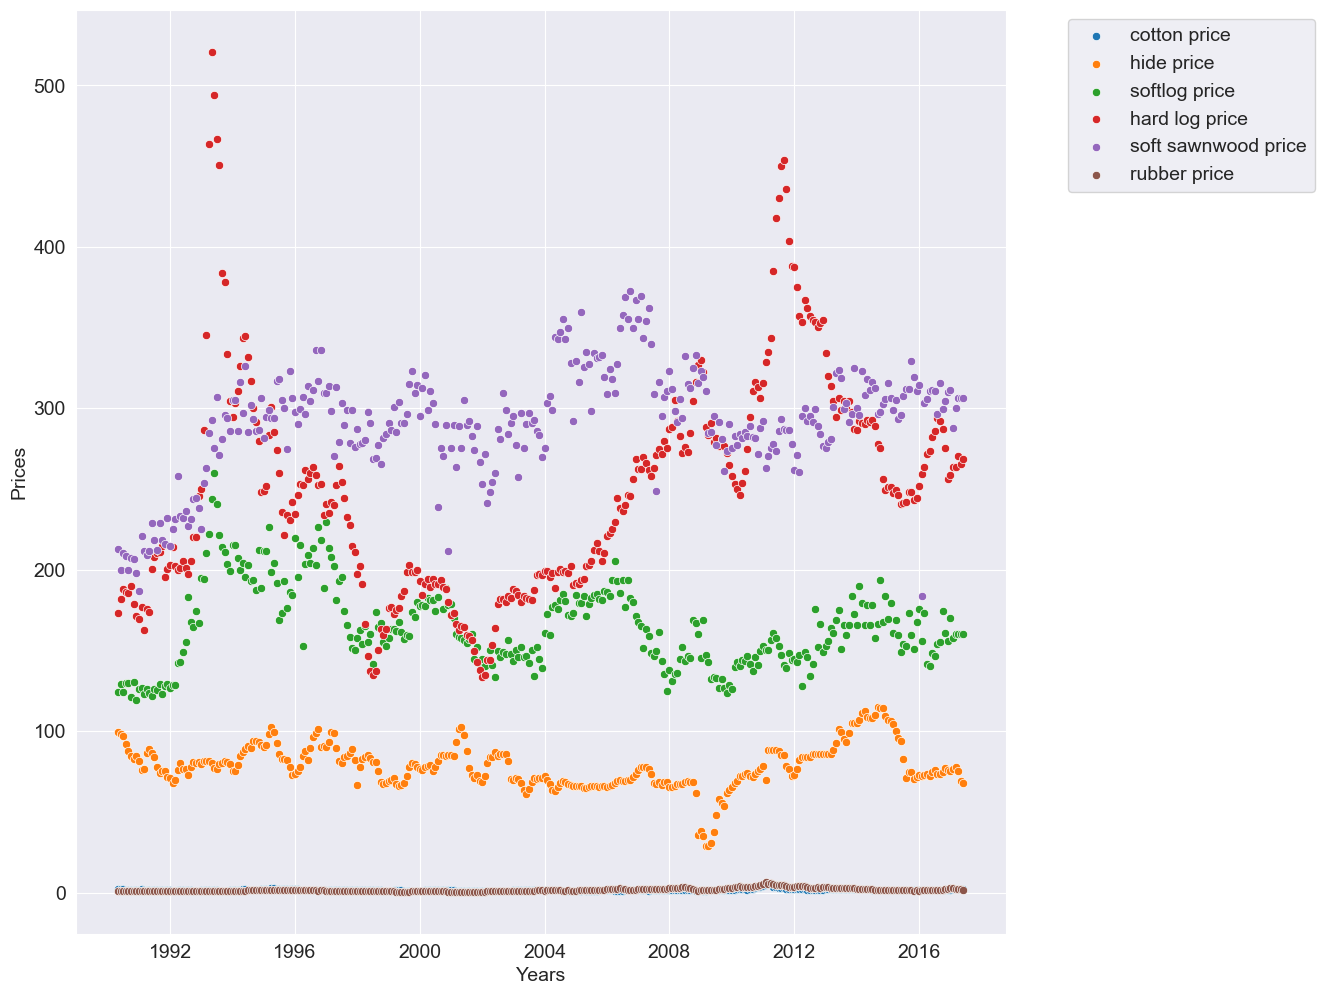

In [69]:
lowList=['cotton price', 'hide price', 'softlog price', 'hard log price', 'soft sawnwood price','rubber price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')

for i in range(len(lowList)):
    sns.scatterplot(y=df[lowList[i]], x=df.index);
    plt.legend(lowList, loc='upper center', bbox_to_anchor=(1.2,1))

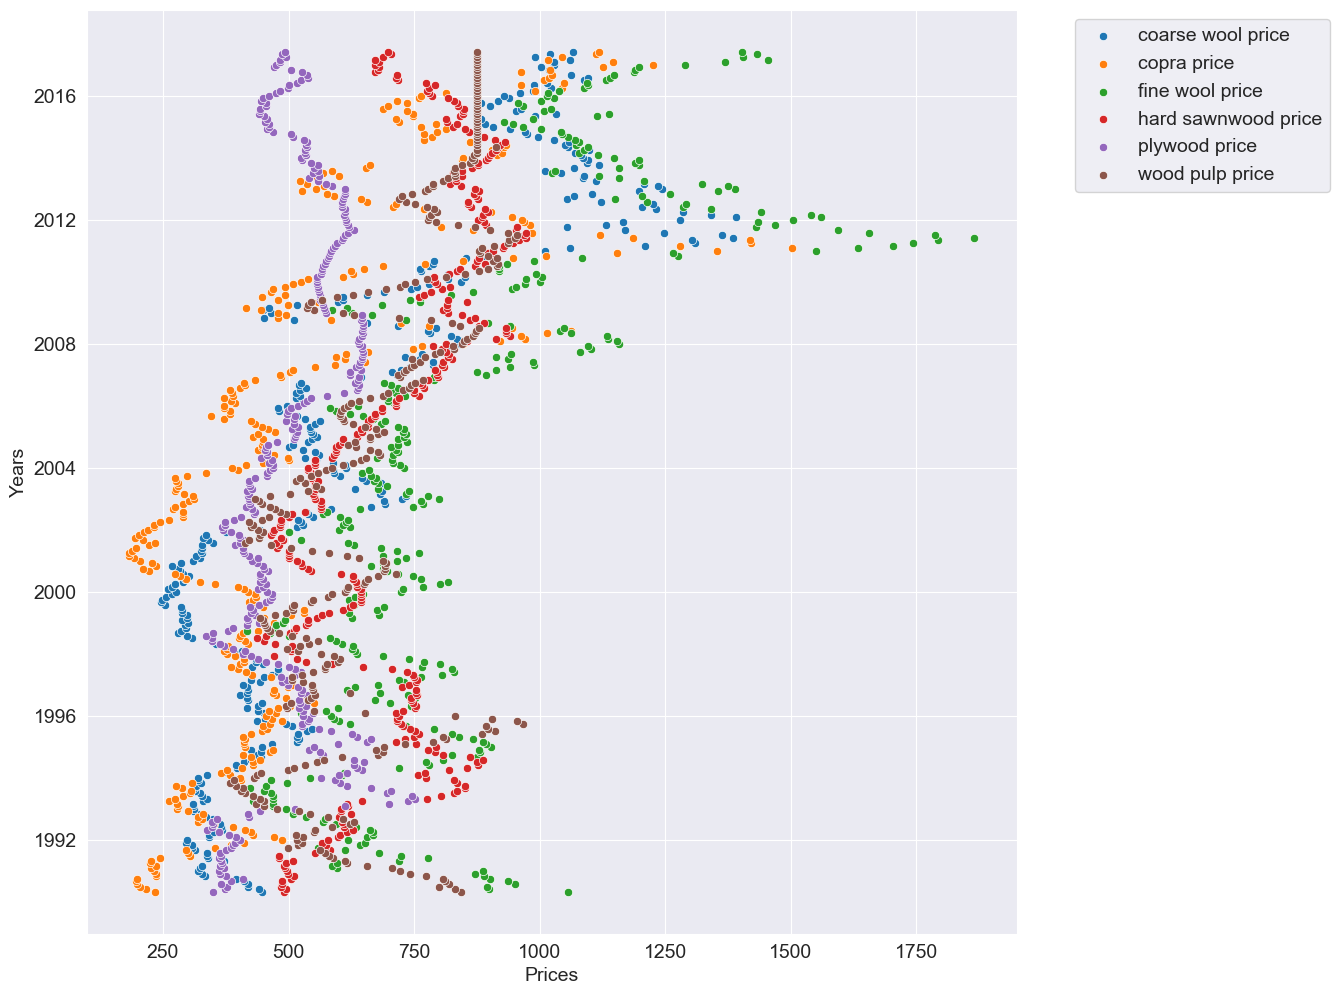

In [70]:
highlist=['coarse wool price','copra price','fine wool price','hard sawnwood price','plywood price','wood pulp price']
plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
    sns.scatterplot(x=df[highlist[i]],y=df.index);
    plt.legend(highlist,loc='upper center',bbox_to_anchor=(1.2,1))

**Analisando o gráfico de dispersão. Podemos perceber que a mudança de preço mais drástica é a da tora bruta para os materiais com uma baixa faixa de preço. Enquanto, nos materiais com uma alto preço, a mudança maior é da lã fina.**


**Q5: Descobrir a faixa de preço de matérias-primas de baixo preço** 

C:\Users\italo\AppData\Local\Temp\ipykernel_7388\568960512.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


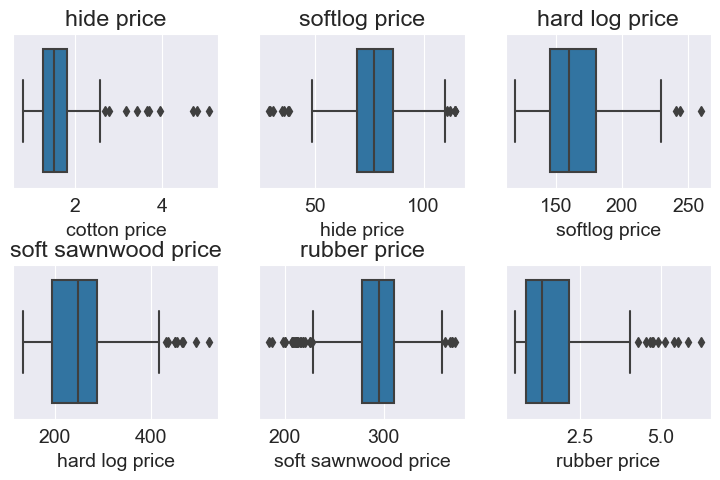

In [71]:
lowList=['cotton price', 'hide price', 'softlog price', 'hard log price', 'soft sawnwood price','rubber price']

for i in range(6):
    plt.title(lowList[i])
    plt.subplot(2,3,i+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x=df[lowList[i]])

Inclui: O intervalo interquartil está entre Q3 e Q1 mínimo, primeiro quartil (Q1), mediana, terceiro quartil (Q3) e máximo e outliers


**Inferências e Conclusão**

* Descobrimos as matérias-primas de alta e baixa gama de acordo com seus preços.
* Descobrimos as matérias-primas que tem alta e baixa mudança percentual de seus preços.
* Pudemos identificar a variação de preços ao longo dos anos.
* Correlação entre as matérias-primas usando um mapa de calor

**Trabalho futuro**
*  Além disso, poderíamos descobrir a relação entre as matérias-primas em detalhes e, com a ajuda do conhecimento do negócio, poderíamos descobrir as matérias-primas mais próximas.
*  Também poderíamos prever os preços das matérias-primas analisando os anos anteriores

* Prevendo a variação de preços e com base nisso, poderíamos planejar nosso uso de matéria-prima com antecedência para o próximo ano e descobrir quaisquer materiais alternativos.

**Projeto para estudos. Com base no vídeo do canal: https://www.youtube.com/@DataMarketing**